In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv("cardio_cleaned.csv")
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

([<matplotlib.axis.YTick at 0x1a1828bc10>,
 [Text(0, 0, 'Unnamed: 0'),
  Text(0, 1, 'age'),
  Text(0, 2, 'gender'),
  Text(0, 3, 'height'),
  Text(0, 4, 'weight'),
  Text(0, 5, 'ap_hi'),
  Text(0, 6, 'ap_lo'),
  Text(0, 7, 'cholesterol'),
  Text(0, 8, 'gluc'),
  Text(0, 9, 'smoke'),
  Text(0, 10, 'alco'),
  Text(0, 11, 'active'),
  Text(0, 12, 'cardio')])

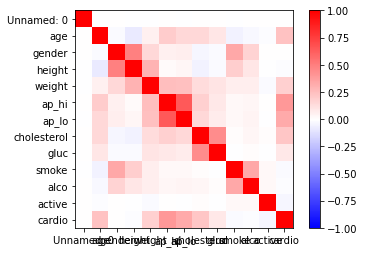

In [3]:
plt.imshow(df.corr(), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(np.arange(0, 13, 1), df.columns)
plt.yticks(np.arange(0, 13, 1), df.columns)

In [4]:
target = df['cardio']
df = df.drop(['Unnamed: 0', 'cardio'], axis=1)
target

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
68971    0.0
68972    1.0
68973    1.0
68974    1.0
68975    0.0
Name: cardio, Length: 68976, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33)

In [6]:
def ROC_Curve(y_test, clf):
    logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.savefig('Log_ROC')
    plt.show()

In [7]:
def Random(df=df, target=target, X=X_train, y=y_train, X2=X_test, y2=y_test):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X, y)
    
    print(clf.predict(X2))
    
    print(clf.score(X2, y2))
    print(classification_report(y2, clf.predict(X2)))
    
    plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
    plt.rcParams.update({'font.size': 14})
    sorted_idx = clf.feature_importances_.argsort()
    plt.barh(df.columns[sorted_idx], clf.feature_importances_[sorted_idx])
    plt.xlabel("Random Forest Feature Importance")
    
    ROC_Curve(y_test, clf)

[1. 0. 1. ... 1. 0. 1.]
0.711769098976409
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.74     11444
         1.0       0.75      0.63      0.68     11319

    accuracy                           0.71     22763
   macro avg       0.72      0.71      0.71     22763
weighted avg       0.72      0.71      0.71     22763



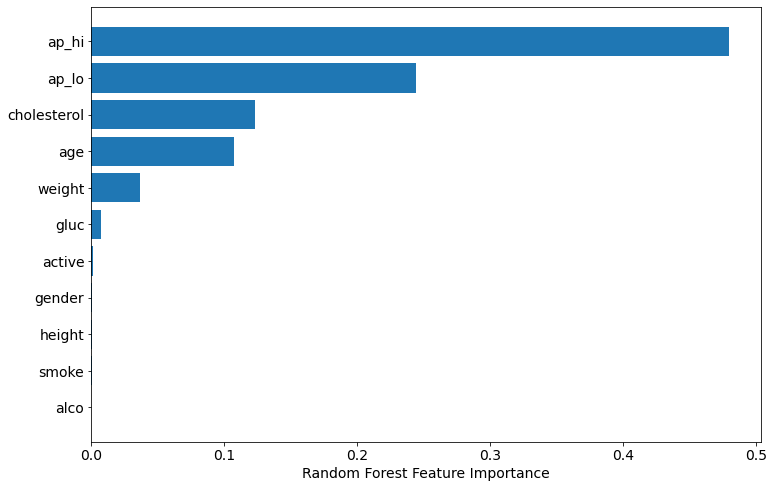

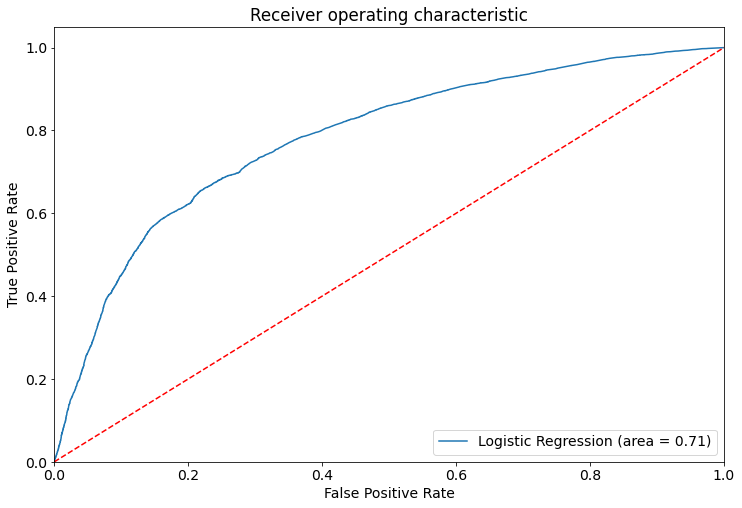

In [8]:
Random(df, target, X_train, y_train, X_test, y_test)

In [ ]:
df['bmi'] = df['weight']/(df['height']/100)**2
df.head()